In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
ridership = pd.read_csv('MBTA_Bus_Ridership_by_Time_Period%2C_Season%2C_Route_Line%2C_and_Stop.csv')
bus_stops = pd.read_csv('PATI_Bus_Stops.csv')

/var/folders/hr/zf5nfygs6q543y4zbp9sfzk00000gn/T/ipykernel_99186/2141469823.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  ridership = pd.read_csv('MBTA_Bus_Ridership_by_Time_Period%2C_Season%2C_Route_Line%2C_and_Stop.csv')


In [81]:
ridership.head()

,mode,season,route_id,route_name,route_variant,stop_sequence,direction_id,day_type_id,day_type_name,time_period_id,time_period_name,stop_name,stop_id,average_ons,average_offs,average_load,num_trips,ObjectId
0,3,Fall 2016,1,1,1-_-0,23,0,day_type_01,weekday,time_period_08,LATE_EVENING,MASSACHUSETTS AVE @ DANA ST,107,0.250,1.09,9.80,10,1
1,3,Fall 2016,1,1,1-_-0,24,0,day_type_01,weekday,time_period_08,LATE_EVENING,MASSACHUSETTS AVE @ TROWBRIDG,108,0.070,1.79,8.08,10,2
2,3,Fall 2016,1,1,1-_-0,25,0,day_type_01,weekday,time_period_08,LATE_EVENING,MASSACHUSETTS AVE @ BOW ST,109,0.010,1.05,7.04,10,3
3,3,Fall 2016,1,1,1-_-0,26,0,day_type_01,weekday,time_period_08,LATE_EVENING,MASSACHUSETTS AVE @ HOLYOKE S,110,0.000,6.62,0.36,10,4
4,3,Fall 2016,1,1,1-_-0,1,0,day_type_01,weekday,time_period_04,MIDDAY_BASE,DUDLEY STATION,64,20.685,0.00,20.99,20,5


In [82]:
# dictionary of time_period_id to time_period_name from the ridership data
time_period_dict = {}
for index, row in ridership.iterrows():
    time_period_dict[row['time_period_id']] = row['time_period_name']

time_period_dict = dict(sorted(time_period_dict.items()))
print(time_period_dict)

{'time_period_01': 'VERY_EARLY_MORNING', 'time_period_02': 'EARLY_AM', 'time_period_03': 'AM_PEAK', 'time_period_04': 'MIDDAY_BASE', 'time_period_05': 'MIDDAY_SCHOOL', 'time_period_06': 'PM_PEAK', 'time_period_07': 'EVENING', 'time_period_08': 'LATE_EVENING', 'time_period_09': 'NIGHT', 'time_period_10': 'OFF_PEAK', 'time_period_11': 'OFF_PEAK'}


In [83]:
sub_data = ridership[ridership['time_period_id'] == 'time_period_10']
print(np.unique(sub_data['time_period_name']))

['OFF_PEAK']


In [84]:
bus_stops.head()

,X,Y,FID,Field1,Stop_ID,Stop_Name,Longitude,Latitude,Municip,PATI_Prior,...,Hydrants17,UtPoles17,LtPoles17,NewsBxs17,MailBxs17,Planters17,BlkdPath17,SeatNum17,SeatType17,SeatCond17
0,-71.077301,42.341006,1,800,1249,Tremont St @ Rutland Sq,-71.077301,42.341006,Boston,Low,...,0,0,0,0,0,0,No,0,,
1,-71.078787,42.340187,2,801,1250,Tremont St @ Worcester St,-71.078787,42.340187,Boston,Medium,...,0,0,1,0,0,0,No,0,,
2,-71.079768,42.339703,3,802,1251,Tremont St @ W Springfield St,-71.079768,42.339703,Boston,Compliant,...,0,1,1,0,0,0,No,0,,
3,-71.081129,42.338955,4,803,1252,Tremont St @ Northampton St,-71.081129,42.338955,Boston,Medium,...,0,0,1,0,0,0,No,0,,
4,-71.083178,42.337824,5,804,1253,Tremont St @ Douglas Pk,-71.083178,42.337824,Boston,Medium,...,0,0,1,0,0,0,No,0,,


In [85]:
# keep route 1 only
ridership = ridership[ridership['route_id'] == 1]
ridership = ridership[ridership['season'] == 'Fall 2022']
ridership = ridership[ridership['direction_id'] == 0]  # there are 2 directions for each route (0 and 1)
# ridership = ridership[ridership['time_period_name'] == 'MIDDAY_BASE']
ridership.head()

,mode,season,route_id,route_name,route_variant,stop_sequence,direction_id,day_type_id,day_type_name,time_period_id,time_period_name,stop_name,stop_id,average_ons,average_offs,average_load,num_trips,ObjectId
759451,3,Fall 2022,1,1,1-_-0,0,0,day_type_01,weekday,time_period_03,AM_PEAK,NUBIAN STATION,64,12.900000,0.000000,12.940000,15,759452
759452,3,Fall 2022,1,1,1-_-0,1,0,day_type_01,weekday,time_period_03,AM_PEAK,WASHINGTON ST OPP RUGGLES ST,1,0.246667,0.020000,13.160000,15,759453
759453,3,Fall 2022,1,1,1-_-0,2,0,day_type_01,weekday,time_period_03,AM_PEAK,WASHINGTON ST @ MELNEA CASS B,2,0.433333,0.073333,13.566667,15,759454
759454,3,Fall 2022,1,1,1-_-0,3,0,day_type_01,weekday,time_period_03,AM_PEAK,MELNEA CASS BLVD @ HARRISON A,6,0.026667,0.046667,13.560000,15,759455
759456,3,Fall 2022,1,1,1-_-0,4,0,day_type_01,weekday,time_period_03,AM_PEAK,ALBANY ST OPP RANDALL ST,10003,0.520000,0.533333,14.320000,15,759457


In [86]:
ridership['stop_sequence'].value_counts()

stop_sequence
0     11
1     11
22    11
21    11
20    11
19    11
18    11
17    11
16    11
15    11
14    11
13    11
12    11
11    11
10    11
9     11
8     11
7     11
6     11
5     11
4     11
3     11
2     11
23    11
Name: count, dtype: int64

In [87]:
ridership[ridership['stop_sequence'] == 4]

,mode,season,route_id,route_name,route_variant,stop_sequence,direction_id,day_type_id,day_type_name,time_period_id,time_period_name,stop_name,stop_id,average_ons,average_offs,average_load,num_trips,ObjectId
759456,3,Fall 2022,1,1,1-_-0,4,0,day_type_01,weekday,time_period_03,AM_PEAK,ALBANY ST OPP RANDALL ST,10003,0.520000,0.533333,14.320000,15,759457
759513,3,Fall 2022,1,1,1-_-0,4,0,day_type_01,weekday,time_period_02,EARLY_AM,ALBANY ST OPP RANDALL ST,10003,0.385714,0.228571,11.028571,7,759514
759763,3,Fall 2022,1,1,1-_-0,4,0,day_type_01,weekday,time_period_07,EVENING,ALBANY ST OPP RANDALL ST,10003,0.209091,0.063636,4.604545,22,759764
759790,3,Fall 2022,1,1,1-_-0,4,0,day_type_01,weekday,time_period_08,LATE_EVENING,ALBANY ST OPP RANDALL ST,10003,0.033333,0.055556,3.311111,9,759791
759836,3,Fall 2022,1,1,1-_-0,4,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,ALBANY ST OPP RANDALL ST,10003,0.237500,0.150000,10.200000,8,759837
759842,3,Fall 2022,1,1,1-_-0,4,0,day_type_01,weekday,time_period_09,NIGHT,ALBANY ST OPP RANDALL ST,10003,0.020000,0.040000,2.760000,5,759843
759887,3,Fall 2022,1,1,1-_-0,4,0,day_type_02,saturday,time_period_10,OFF_PEAK,ALBANY ST OPP RANDALL ST,10003,0.259649,0.090351,7.715789,114,759888
759903,3,Fall 2022,1,1,1-_-0,4,0,day_type_01,weekday,time_period_04,MIDDAY_BASE,ALBANY ST OPP RANDALL ST,10003,0.271429,0.235714,14.171429,28,759904
759964,3,Fall 2022,1,1,1-_-0,4,0,day_type_01,weekday,time_period_05,MIDDAY_SCHOOL,ALBANY ST OPP RANDALL ST,10003,0.511765,0.241176,12.905882,17,759965
759980,3,Fall 2022,1,1,1-_-0,4,0,day_type_03,sunday,time_period_11,OFF_PEAK,ALBANY ST OPP RANDALL ST,10003,0.280247,0.098765,7.454321,81,759981


For route 1, two different stops have same name: MASSACHUSETTS AVE @ ALBANY ST. Rename the second one to MASSACHUSETTS AVE @ ALBANY ST 2

In [88]:
# rename bus stop with id 99 to MASSACHUSETTS AVE @ ALBANY ST 2
ridership.loc[ridership['stop_id'] == 99, 'stop_name'] = 'MASSACHUSETTS AVE @ ALBANY ST 2'


In [89]:
# form the list of stops in the order given by the stop_sequence
ridership = ridership.sort_values(by=['stop_sequence'])
print(ridership[['stop_id', 'stop_name']])

# list of stops
stop_names_sorted = ridership['stop_name'].unique()
stop_ids_sorted = ridership['stop_id'].unique()
print(stop_names_sorted)
print(stop_ids_sorted)
print(len(stop_names_sorted))
print(len(stop_ids_sorted))

        stop_id                      stop_name
759451       64                 NUBIAN STATION
759808       64                 NUBIAN STATION
759864       64                 NUBIAN STATION
759786       64                 NUBIAN STATION
759891       64                 NUBIAN STATION
...         ...                            ...
759758      110  MASSACHUSETTS AVE @ HOLYOKE S
759971      110  MASSACHUSETTS AVE @ HOLYOKE S
759933      110  MASSACHUSETTS AVE @ HOLYOKE S
759859      110  MASSACHUSETTS AVE @ HOLYOKE S
759979      110  MASSACHUSETTS AVE @ HOLYOKE S

[264 rows x 2 columns]
['NUBIAN STATION' 'WASHINGTON ST OPP RUGGLES ST'
 'WASHINGTON ST @ MELNEA CASS B' 'MELNEA CASS BLVD @ HARRISON A'
 'ALBANY ST OPP RANDALL ST' 'MASSACHUSETTS AVE @ ALBANY ST'
 'MASSACHUSETTS AVE @ HARRISON' 'MASSACHUSETTS AVE @ WASHINGTO'
 'MASSACHUSETTS AVE @ TREMONT S' 'MASSACHUSETTS AVE @ MASSACHUS'
 'MASSACHUSETTS AVE @ ST BOTOLP' 'MASSACHUSETTS AVE @ CLEARWAY'
 'MASSACHUSETTS AVE @ NEWBURY S' 'MASSACHUSET

In [90]:
# select some columns only
bus_stops = bus_stops[['X', 'Y', 'Stop_ID', 'Stop_Name']]
# change stop_name to upper case
bus_stops['Stop_Name'] = bus_stops['Stop_Name'].str.upper()

In [91]:
bus_stops['Stop_ID'].value_counts()

Stop_ID
903      5
88333    4
38671    4
1055     4
1332     4
        ..
3617     1
3616     1
5519     1
5518     1
49003    1
Name: count, Length: 6890, dtype: int64

In [92]:
selected_stops = bus_stops[bus_stops['Stop_ID'].isin(stop_ids_sorted)]
# similar as before
selected_stops.loc[selected_stops['Stop_ID'] == 99, 'Stop_Name'] = 'MASSACHUSETTS AVE @ ALBANY ST 2'

In [93]:
selected_stops

,X,Y,Stop_ID,Stop_Name
800,-71.082754,42.330957,1,WASHINGTON ST OPP RUGGLES ST
801,-71.081252,42.332324,2,WASHINGTON ST @ MELNEA CASS BLVD
805,-71.079576,42.332016,6,MELNEA CASS BLVD @ HARRISON AVE
844,-71.073541,42.333825,57,MASSACHUSETTS AVE @ ALBANY ST
845,-71.074931,42.334948,58,MASSACHUSETTS AVE @ HARRISON AVE
870,-71.080362,42.339459,87,MASSACHUSETTS AVE @ TREMONT ST
871,-71.084121,42.342303,89,MASSACHUSETTS AVE @ ST BOTOLPH ST
872,-71.086739,42.345331,91,MASSACHUSETTS AVE @ CLEARWAY ST
873,-71.088033,42.348005,93,MASSACHUSETTS AVE @ NEWBURY ST
874,-71.089334,42.350773,95,MASSACHUSETTS AVE @ BEACON ST


In [94]:
# drop names duplicates
selected_stops = selected_stops.drop_duplicates(subset=['Stop_Name'])

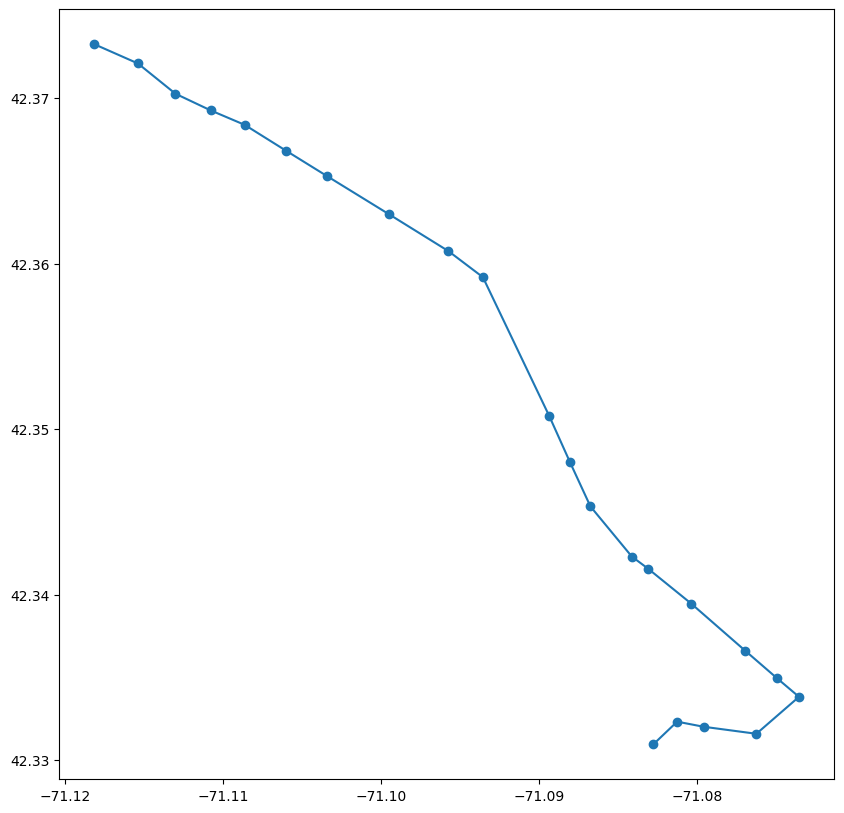

In [95]:
route_1_coordinates_x = []
route_1_coordinates_y = []
for id in list(stop_ids_sorted)[1:]:
    name = selected_stops[selected_stops['Stop_ID'] == id]['Stop_Name'].values[0]
    x = selected_stops[selected_stops['Stop_Name'] == name]['X'].values[0]
    y = selected_stops[selected_stops['Stop_Name'] == name]['Y'].values[0]
    route_1_coordinates_x.append(x)
    route_1_coordinates_y.append(y) 


plt.figure(figsize=(10, 10))
plt.plot(route_1_coordinates_x, route_1_coordinates_y, 'o-')
plt.show()


It matches with --> https://www.mbta.com/schedules/1/line
Except first stop which is missing:

In [96]:
# check difference between selected_stops and stop_ids_sorted
set(stop_ids_sorted) - set(selected_stops['Stop_ID'])


{64}

Nubian Station is missing in the bus stops data. Add it to the bus stops data.
We find the coordinates manually from google map.

In [97]:
new_x, new_y = -71.0864566, 42.3297326
new_name = "NUBIAN STATION"
new_id = 64
# add the row to selected_stops dataframe
selected_stops = pd.concat([selected_stops, pd.DataFrame([[new_x, new_y, new_id, new_name]], columns=['X', 'Y', 'Stop_ID', 'Stop_Name'])], ignore_index=True)

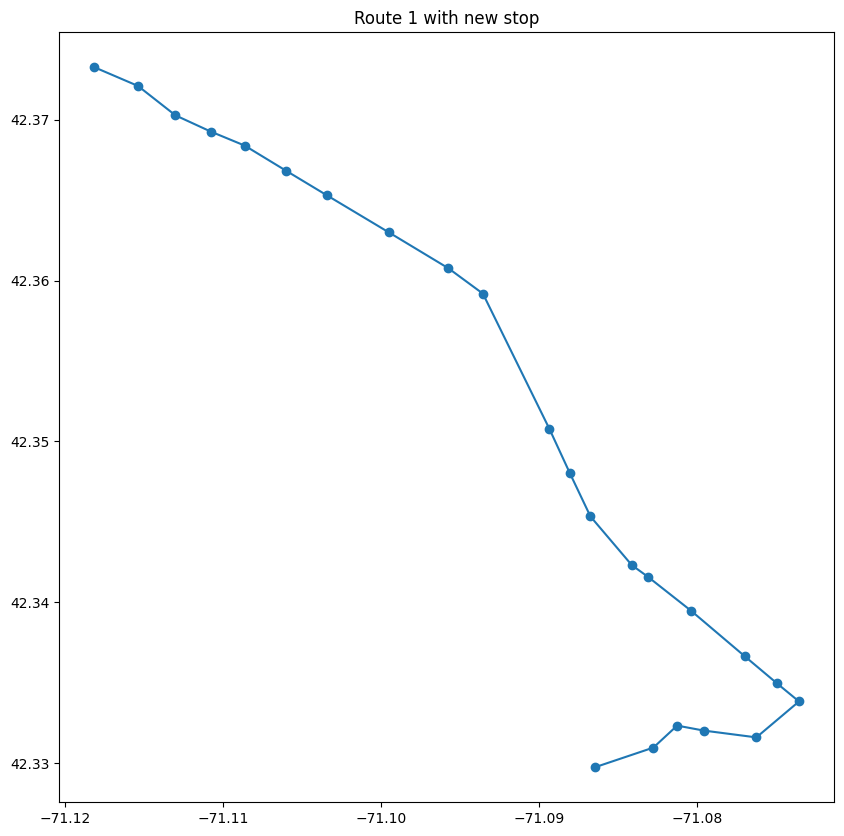

In [98]:
route_1_coordinates_x = []
route_1_coordinates_y = []
for id in list(stop_ids_sorted):
    name = selected_stops[selected_stops['Stop_ID'] == id]['Stop_Name'].values[0]
    x = selected_stops[selected_stops['Stop_Name'] == name]['X'].values[0]
    y = selected_stops[selected_stops['Stop_Name'] == name]['Y'].values[0]
    route_1_coordinates_x.append(x)
    route_1_coordinates_y.append(y) 

plt.figure(figsize=(10, 10))
plt.plot(route_1_coordinates_x, route_1_coordinates_y, 'o-')
plt.title("Route 1 with new stop")
plt.show()


In [99]:
# number of rows of ridership dataframe
print(len(ridership))
print(len(selected_stops))

264
24


In [100]:
#keep some columns only for ridership:
ridership = ridership[['stop_id', 'average_ons', 'average_offs', 'average_load', 'time_period_id']]
# merge ridership and selected_stops on stop_id
ridership = ridership.merge(selected_stops, left_on='stop_id', right_on='Stop_ID')

In [101]:
ridership

,stop_id,average_ons,average_offs,average_load,time_period_id,X,Y,Stop_ID,Stop_Name
0,64,12.900000,0.000000,12.940000,time_period_03,-71.086457,42.329733,64,NUBIAN STATION
1,64,2.580000,0.000000,2.660000,time_period_09,-71.086457,42.329733,64,NUBIAN STATION
2,64,6.630702,0.000000,6.752632,time_period_10,-71.086457,42.329733,64,NUBIAN STATION
3,64,2.955556,0.000000,3.155556,time_period_08,-71.086457,42.329733,64,NUBIAN STATION
4,64,12.117857,0.000000,12.432143,time_period_04,-71.086457,42.329733,64,NUBIAN STATION
...,...,...,...,...,...,...,...,...,...
259,110,0.000000,3.600000,0.357143,time_period_02,-71.118124,42.373259,110,MASSACHUSETTS AVE @ HOLYOKE ST
260,110,0.000000,4.287500,0.425000,time_period_01,-71.118124,42.373259,110,MASSACHUSETTS AVE @ HOLYOKE ST
261,110,0.000000,8.506140,0.330702,time_period_10,-71.118124,42.373259,110,MASSACHUSETTS AVE @ HOLYOKE ST
262,110,0.000000,10.048148,0.197531,time_period_11,-71.118124,42.373259,110,MASSACHUSETTS AVE @ HOLYOKE ST


In [102]:
# Note: the order of the stops is given by the stop_sequence column
ridership.to_csv('data_route1_time_periods.csv', index=False)